In [3]:
import pandas as pd
from os import walk

In [4]:
datasets_names = []
path_df = '../datasets/original_files/'
for (dirpath, dirnames, filenames) in walk(path_df):
    datasets_names.extend(filenames)
    break
datasets_names

['boston-listings.csv.gz',
 'los_angeles-listings.csv.gz',
 'new_york_city-listings.csv.gz']

In [11]:
dataFrame = False
first = True
for name in datasets_names:
    if(first):
        first = False
        dataFrame = pd.read_csv(path_df+name, compression='gzip')
        dataFrame.set_index('id', drop=False, inplace=True)
        print('adding', len(dataFrame), 'rows')
        dataFrame ['file']=name
    else:
        _tmpDf = pd.read_csv(path_df+name, compression='gzip')
        _tmpDf.set_index('id', drop=False, inplace=True)
        _tmpDf['file']=name
        print('adding', len(_tmpDf), 'rows')
        dataFrame = pd.concat([dataFrame, _tmpDf])
        del _tmpDf
print('total rows:', len(dataFrame))


adding 3799 rows
adding 38481 rows
adding 50796 rows
total rows: 93076


In [32]:



df=dataFrame[[
 'name',
 'host_since',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'city',
 'state',
 'country',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'square_feet',
 'price',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'calendar_last_scraped',
 'number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'reviews_per_month',
 'file']]

#cleaning columns
for x in df.columns:
    print(x)
    values = df[x][pd.notna(df[x])].values
    if(len(values) > 0):
        print(values[0])
    else:
        print('NOT_VALUES')
    print('')

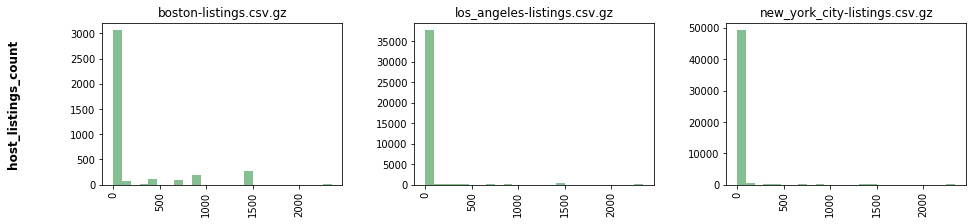

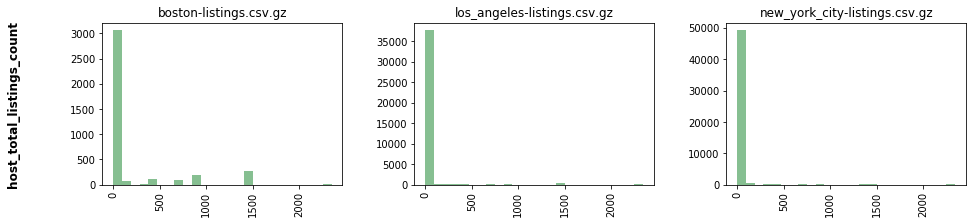

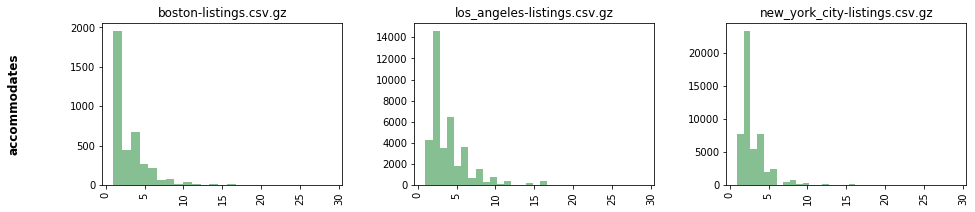

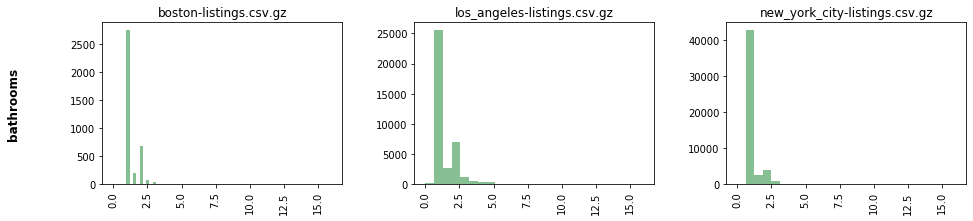

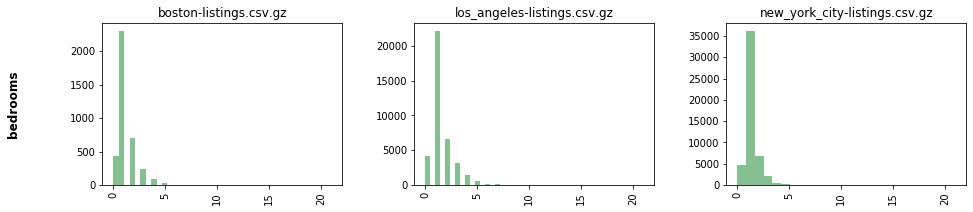

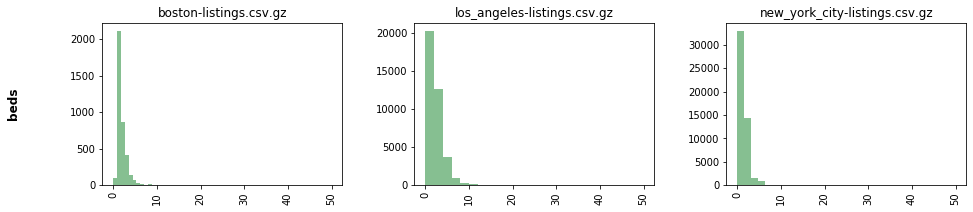

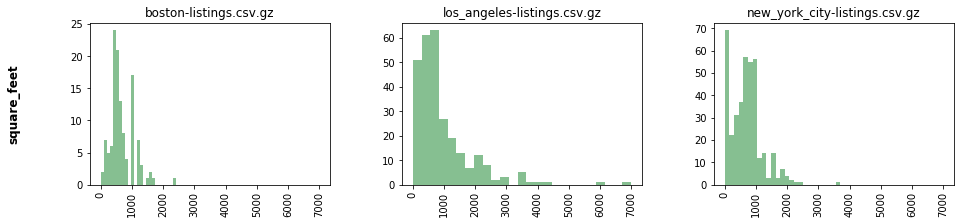

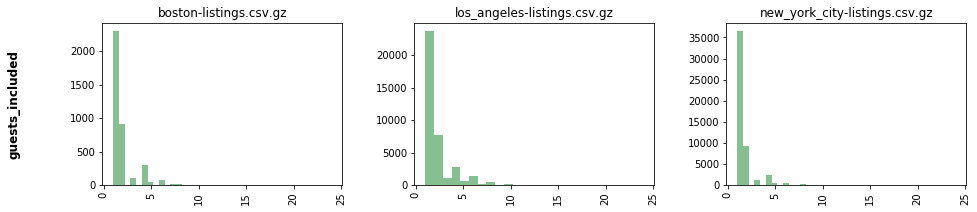

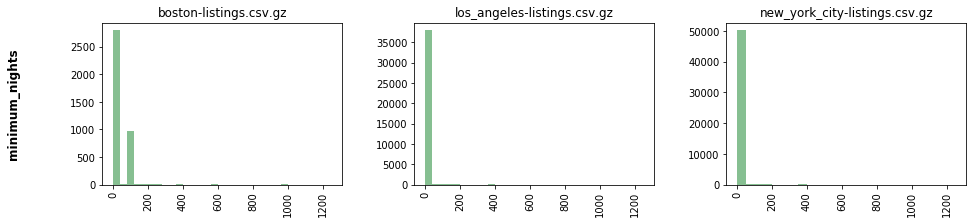

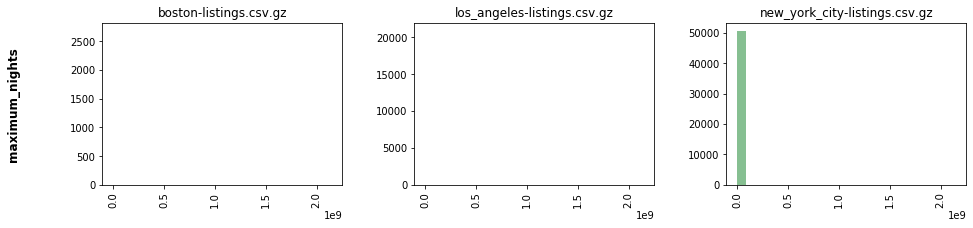

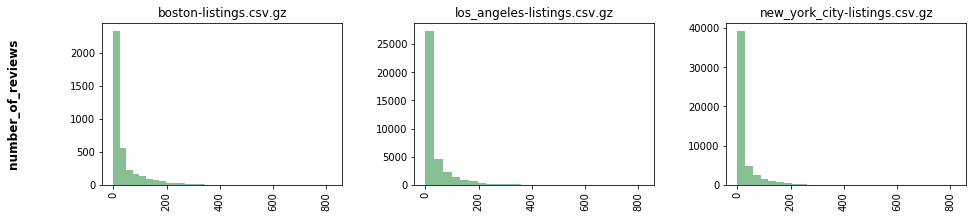

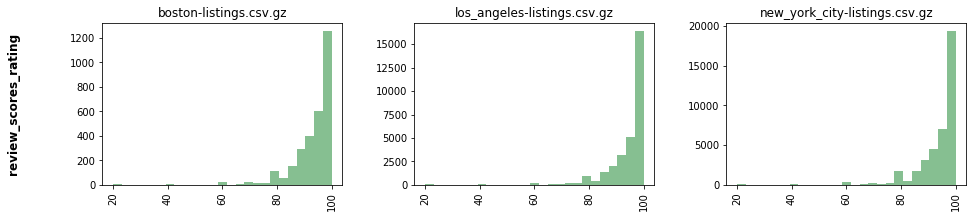

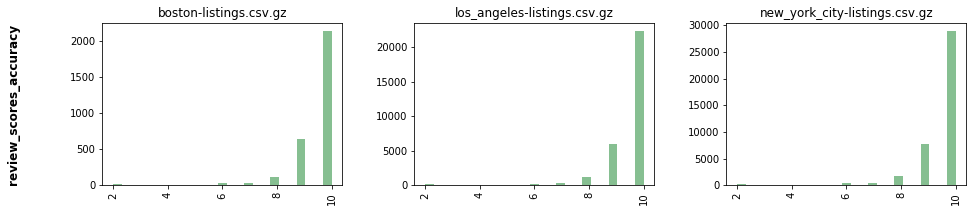

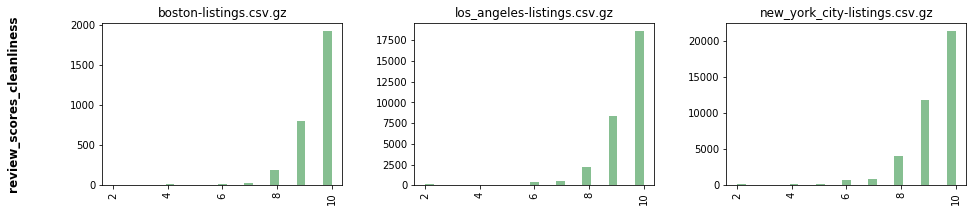

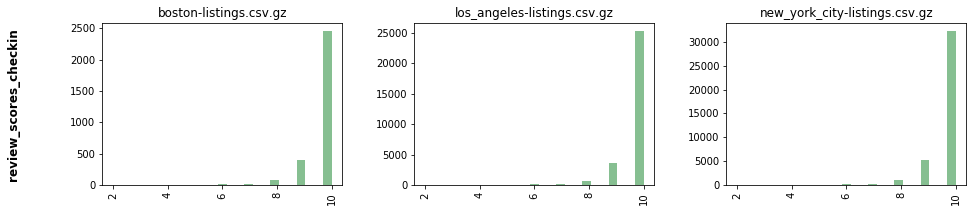

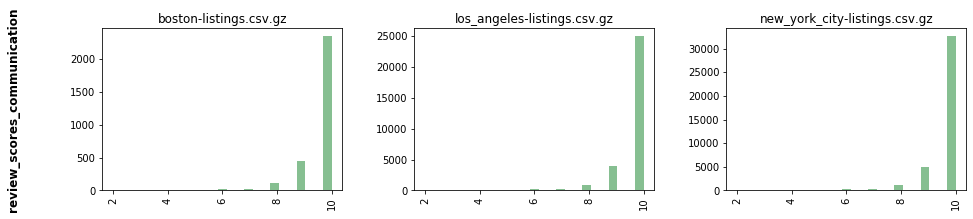

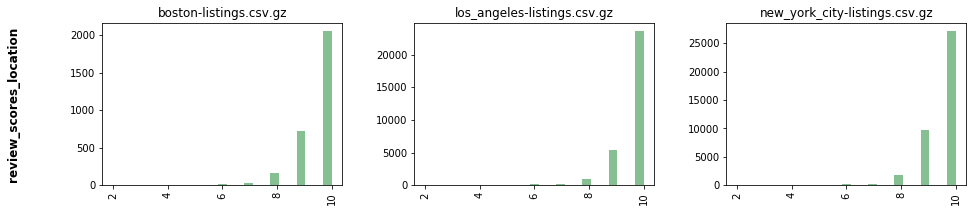

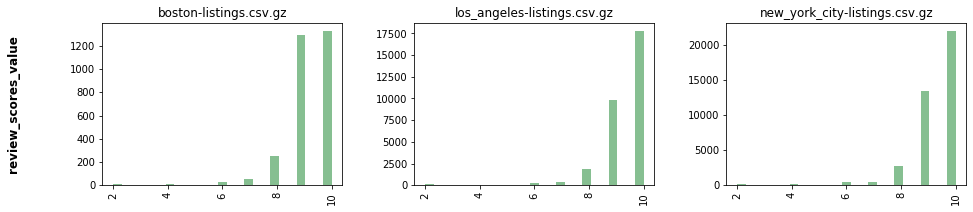

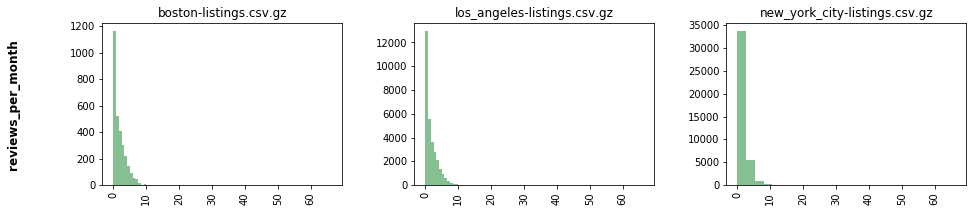

In [84]:
obj_columns=[]

for column in df.columns:
    if (df.dtypes[column]== 'O'):
        a=0
        #df[column].value_counts().plot(kind='barh') #horizontal bar plot
    else:
        h = df.hist(column=column, by='file' , bins=25,  figsize=(15,3), layout=(1,3), color='#86bf91',  sharex=True)
        for i,x in enumerate(h):
            # Set y-axis label
            if i == 0:
                x.set_ylabel(column, labelpad=50, weight='bold', size=12)
        

